In [2]:
import csv 
with open ("OnlineRetail.csv",'r', encoding="utf-8") as file:
    reader = csv.DictReader(file)
    data  = list(reader)

print(data[0])

{'InvoiceNo': '536365', 'StockCode': '85123A', 'Description': 'WHITE HANGING HEART T-LIGHT HOLDER', 'Quantity': '6', 'InvoiceDate': '12/1/2010 08:26', 'UnitPrice': '2.55', 'CustomerID': '17850', 'Country': 'United Kingdom'}


In [3]:
for i in range(5):
    print(data[i])

{'InvoiceNo': '536365', 'StockCode': '85123A', 'Description': 'WHITE HANGING HEART T-LIGHT HOLDER', 'Quantity': '6', 'InvoiceDate': '12/1/2010 08:26', 'UnitPrice': '2.55', 'CustomerID': '17850', 'Country': 'United Kingdom'}
{'InvoiceNo': '536365', 'StockCode': '71053', 'Description': 'WHITE METAL LANTERN', 'Quantity': '6', 'InvoiceDate': '12/1/2010 08:26', 'UnitPrice': '3.39', 'CustomerID': '17850', 'Country': 'United Kingdom'}
{'InvoiceNo': '536365', 'StockCode': '84406B', 'Description': 'CREAM CUPID HEARTS COAT HANGER', 'Quantity': '8', 'InvoiceDate': '12/1/2010 08:26', 'UnitPrice': '2.75', 'CustomerID': '17850', 'Country': 'United Kingdom'}
{'InvoiceNo': '536365', 'StockCode': '84029G', 'Description': 'KNITTED UNION FLAG HOT WATER BOTTLE', 'Quantity': '6', 'InvoiceDate': '12/1/2010 08:26', 'UnitPrice': '3.39', 'CustomerID': '17850', 'Country': 'United Kingdom'}
{'InvoiceNo': '536365', 'StockCode': '84029E', 'Description': 'RED WOOLLY HOTTIE WHITE HEART.', 'Quantity': '6', 'InvoiceDa

In [4]:
print(data[0].keys())

dict_keys(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'])


### Q1. Find mean , std dev, min, max of uniprice field.

In [5]:
import statistics

values = [
    float(row["UnitPrice"])
    for row in data
    if row["UnitPrice"] != ""
]
avg = sum(values) / len(values)

std = statistics.stdev(values)

max_value = max(
    float(row["UnitPrice"])
    for row in data
    if row["UnitPrice"] != ""
)
min_value = min(
    float(row["UnitPrice"])
    for row in data
    if row["UnitPrice"] != ""
)

print("Average Unit Price:", avg)
print("Standard Deviation:",std)
print("Max Value:",max_value)
print("Min Value:",min_value)


Average Unit Price: 4.611113626088513
Standard Deviation: 96.75985306117938
Max Value: 38970.0
Min Value: -11062.06


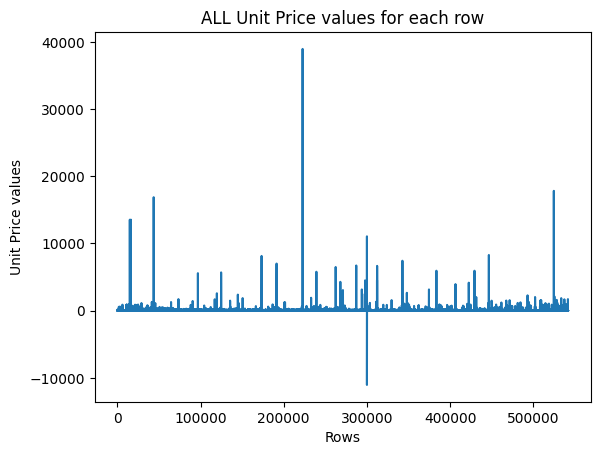

In [6]:
import matplotlib.pyplot as plt
plt.plot(values)
plt.xlabel("Rows")
plt.ylabel("Unit Price values")
plt.title("ALL Unit Price values for each row")
plt.show()

### Q2. Draw histogram of unitprice field using matplotlib

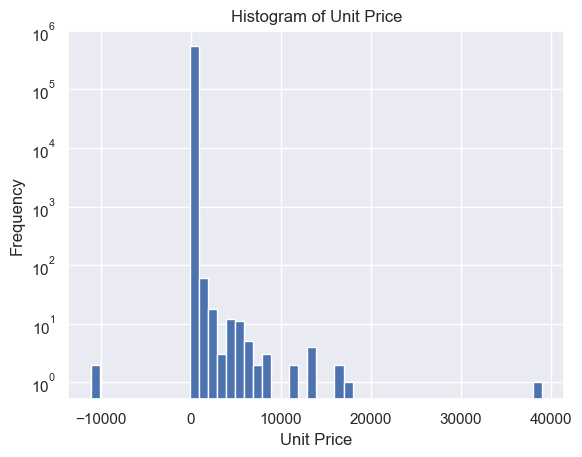

In [32]:
import matplotlib.pyplot as plt

plt.hist(values, bins=50)
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.title("Histogram of Unit Price")
plt.yscale("log")
plt.show()


In [8]:
countries = set(row["Country"] for row in data)
print(countries)

{'Iceland', 'Switzerland', 'EIRE', 'Norway', 'Australia', 'Unspecified', 'United Arab Emirates', 'Israel', 'Poland', 'Cyprus', 'Bahrain', 'European Community', 'Japan', 'Lithuania', 'Singapore', 'Saudi Arabia', 'Channel Islands', 'Belgium', 'Greece', 'Finland', 'USA', 'Brazil', 'France', 'Canada', 'Portugal', 'RSA', 'Sweden', 'Hong Kong', 'Czech Republic', 'Austria', 'United Kingdom', 'Denmark', 'Malta', 'Italy', 'Lebanon', 'Spain', 'Netherlands', 'Germany'}


### Q3. Find mean of unitprice group by country and plot them

In [9]:
from collections import defaultdict
country_prices = defaultdict(list)

for row in data:
    country = row["Country"]
    price = float(row["UnitPrice"])

    country_prices[country].append(price)
    
mean_price = {}

for country, prices in country_prices.items():
    mean = float(sum(prices)) / float(len(prices))
    mean_price[country] = mean

print(mean_price)


{'United Kingdom': 4.5324221741429485, 'France': 5.028864087881266, 'Australia': 3.220611596505163, 'Netherlands': 2.738317165752847, 'Germany': 3.9669299631384938, 'Norway': 6.012025782688767, 'EIRE': 5.911077354807223, 'Switzerland': 3.4034415584415583, 'Spain': 4.98754441373865, 'Poland': 4.1708797653958944, 'Portugal': 8.582975641869652, 'Italy': 4.831120797011208, 'Belgium': 3.6443354277428712, 'Lithuania': 2.841142857142857, 'Japan': 2.276145251396648, 'Iceland': 2.644010989010989, 'Channel Islands': 4.93212401055409, 'Denmark': 3.25694087403599, 'Cyprus': 6.3023633440514475, 'Sweden': 3.910887445887446, 'Austria': 4.243192019950125, 'Israel': 3.633131313131313, 'Finland': 5.448705035971223, 'Bahrain': 4.556315789473683, 'Greece': 4.885547945205479, 'Hong Kong': 42.505208333333336, 'Singapore': 109.64580786026201, 'Lebanon': 5.387555555555555, 'United Arab Emirates': 3.3807352941176467, 'Saudi Arabia': 2.411, 'Czech Republic': 2.9383333333333335, 'Canada': 6.030331125827815, 'Uns

Text(0.5, 1.0, 'Mean Unit price by country')

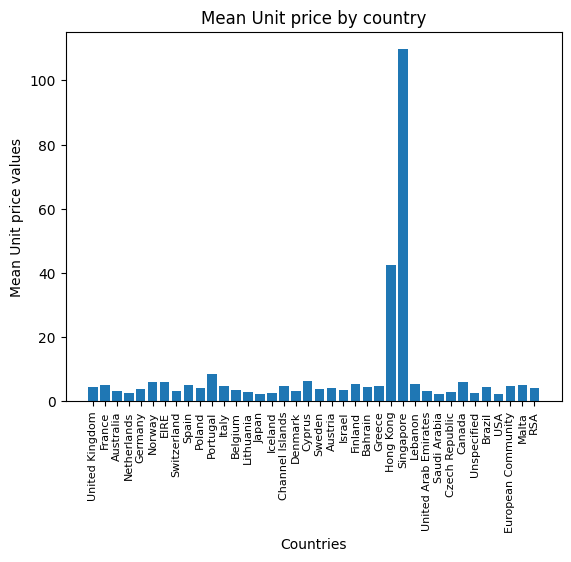

In [10]:
import matplotlib.pyplot as plt

countries = list(mean_price.keys())
mean_prices = list(mean_price.values())

plt.bar(countries, mean_prices )
plt.xticks(rotation = 90, fontsize = 8)
plt.xlabel("Countries")
plt.ylabel("Mean Unit price values")
plt.title("Mean Unit price by country")

### Q4. Find min and max of unit price group by customerID

In [11]:
ids = set(row["CustomerID"] for row in data)
print(ids)
# shows number of ids 

{'', '14145', '13672', '14794', '14854', '14336', '18270', '16097', '15840', '16313', '12383', '15018', '14076', '14642', '17507', '15449', '12955', '17733', '17588', '17086', '14664', '15456', '13402', '13427', '15347', '13658', '14314', '15918', '17809', '15019', '16637', '17790', '17453', '16843', '13136', '12421', '12673', '12668', '13437', '13027', '17889', '17612', '17218', '17022', '15081', '15815', '15674', '12624', '16157', '17754', '14837', '16239', '15339', '17542', '18082', '15786', '14970', '14722', '14761', '14412', '13962', '13091', '14198', '13668', '12550', '16927', '13245', '13926', '15181', '18099', '15158', '13692', '17817', '13266', '13487', '14810', '15561', '17505', '14869', '13925', '16716', '12733', '13689', '15463', '14037', '17716', '17722', '13662', '13742', '18118', '17052', '17468', '17550', '13435', '13229', '13283', '16692', '14360', '15482', '12355', '16245', '18193', '14618', '13368', '12684', '15163', '14585', '17604', '15638', '13113', '16056', '1661

In [12]:
from collections import defaultdict
import statistics

customer_unitprice = defaultdict(list)

for row in data:
    id = row["CustomerID"]
    price = float(row["UnitPrice"])
    customer_unitprice[id].append(price)

customer_min_max =  {}

for id , price in customer_unitprice.items():
    min_price = min(price)
    max_price = max(price)
    customer_min_max[id] = (min_price, max_price)

for id, (mn, mx) in customer_min_max.items():
    print(f"Customer id {id}: Min: {mn} , Max: {mx}")

Customer id 17850: Min: 1.06 , Max: 35.75
Customer id 13047: Min: 0.42 , Max: 14.95
Customer id 12583: Min: 0.06 , Max: 18.0
Customer id 13748: Min: 0.39 , Max: 14.95
Customer id 15100: Min: 10.95 , Max: 10.95
Customer id 15291: Min: 0.29 , Max: 45.0
Customer id 14688: Min: 0.19 , Max: 25.0
Customer id 17809: Min: 0.21 , Max: 717.23
Customer id 15311: Min: 0.12 , Max: 14.95
Customer id 14527: Min: 0.19 , Max: 80.0
Customer id 16098: Min: 0.29 , Max: 21.95
Customer id 18074: Min: 0.65 , Max: 12.75
Customer id 17420: Min: 1.25 , Max: 19.95
Customer id 16029: Min: 0.2 , Max: 8142.75
Customer id 16250: Min: 0.42 , Max: 7.95
Customer id 12431: Min: 0.0 , Max: 16.95
Customer id 17511: Min: 0.1 , Max: 16.95
Customer id 17548: Min: 0.29 , Max: 5.95
Customer id 13705: Min: 0.65 , Max: 165.0
Customer id 13747: Min: 9.95 , Max: 9.95
Customer id 13408: Min: 0.29 , Max: 110.43
Customer id 13767: Min: 0.42 , Max: 12.75
Customer id 17924: Min: 0.29 , Max: 8.5
Customer id 13448: Min: 0.14 , Max: 16.95

### Q5. Find cumulative sales monthly and yearly and plot them using both Matplotlib and Sea Borne.

In [13]:
print(data[0].keys())

dict_keys(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'])


In [14]:
print(data[100000])

{'InvoiceNo': '544796', 'StockCode': '21391', 'Description': 'FRENCH LAVENDER SCENT HEART', 'Quantity': '12', 'InvoiceDate': '2/23/2011 13:37', 'UnitPrice': '2.1', 'CustomerID': '16208', 'Country': 'United Kingdom'}


In [15]:
from datetime import datetime
from collections import defaultdict

monthly_sales = defaultdict(float)

for row in data:
    date = datetime.strptime(row["InvoiceDate"],'%m/%d/%Y %H:%M')
    month = date.month
    year = date.year

    # cal sales
    sale = float(row["Quantity"]) * float(row["UnitPrice"])

    monthly_sales[(year,month)] +=  sale

In [16]:
sorted_month = sorted(monthly_sales)

cumulative = []
total = 0

for month in sorted_month:
    total += monthly_sales[month]
    cumulative.append(total)
    print( f"Month {month} : Ammount : {total}")

Month (2010, 12) : Ammount : 748957.0199999774
Month (2011, 1) : Ammount : 1308957.2800000007
Month (2011, 2) : Ammount : 1807019.9300000276
Month (2011, 3) : Ammount : 2490287.0100000463
Month (2011, 4) : Ammount : 2983494.1310000713
Month (2011, 5) : Ammount : 3706827.6410000813
Month (2011, 6) : Ammount : 4397950.761000104
Month (2011, 7) : Ammount : 5079250.872000135
Month (2011, 8) : Ammount : 5761931.382000152
Month (2011, 9) : Ammount : 6781619.004000163
Month (2011, 10) : Ammount : 7852323.6740001375
Month (2011, 11) : Ammount : 9314079.923999894
Month (2011, 12) : Ammount : 9747747.933999911


['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12']


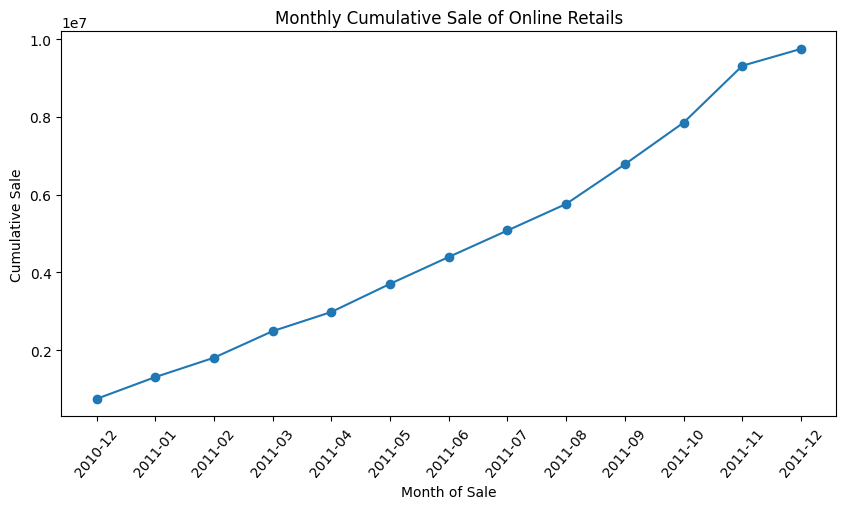

In [17]:
# Plotting  using matplotlib

labels = [ f"{y}-{m:02d}" for y,m in monthly_sales]
print(labels)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(labels, cumulative, marker="o")
plt.xticks(rotation = 50)
plt.xlabel("Month of Sale")
plt.ylabel("Cumulative Sale")
plt.title("Monthly Cumulative Sale of Online Retails")
plt.show()

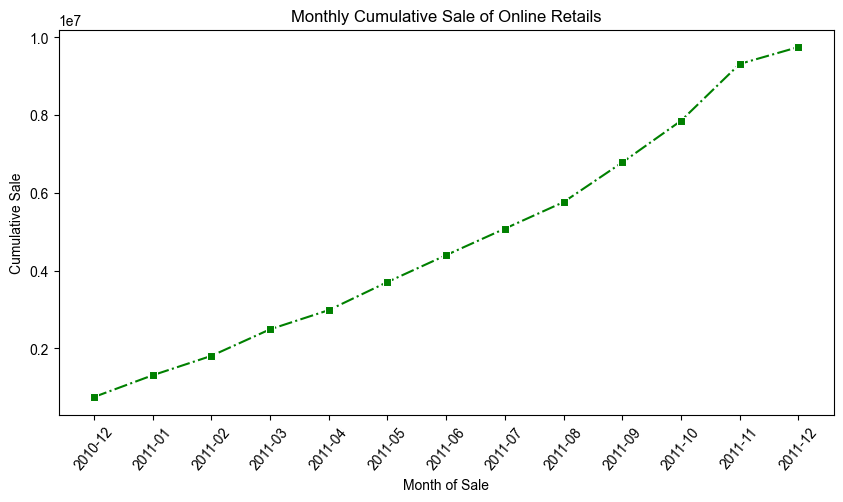

In [18]:
# Plotting using seaborne
import seaborn as sns
import matplotlib.pyplot

plt.figure(figsize=(10,5))
sns.lineplot(x = labels, y = cumulative, marker="s", color="green", linestyle="-.")

sns.set_theme(style="darkgrid")
plt.xticks(rotation = 50)

plt.xlabel("Month of Sale")
plt.ylabel("Cumulative Sale")
plt.title("Monthly Cumulative Sale of Online Retails")
plt.show()

### Q6. Generate a Box plot for each attribute

In [19]:
print(data[0])
# print(data[0].keys())

{'InvoiceNo': '536365', 'StockCode': '85123A', 'Description': 'WHITE HANGING HEART T-LIGHT HOLDER', 'Quantity': '6', 'InvoiceDate': '12/1/2010 08:26', 'UnitPrice': '2.55', 'CustomerID': '17850', 'Country': 'United Kingdom'}


In [20]:
from collections import defaultdict

numeric_data = defaultdict(list)

for row in data:
    numeric_data["Quantity"].append(float(row["Quantity"]))
    numeric_data["UnitPrice"].append(float(row["UnitPrice"]))


C:\Users\Asus\AppData\Local\Temp\ipykernel_22408\1587687736.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


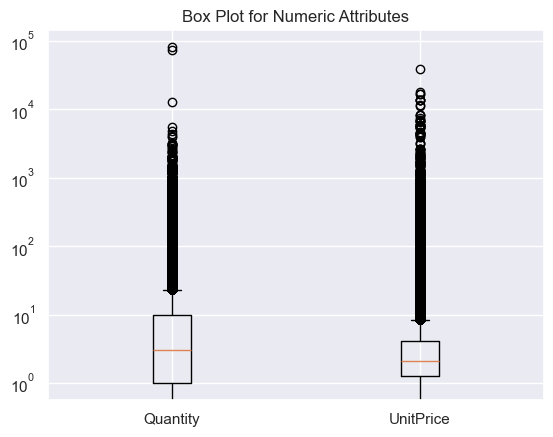

In [33]:
import matplotlib.pyplot as plt


plt.boxplot(
    [numeric_data["Quantity"], numeric_data["UnitPrice"]], 
    labels= ["Quantity", "UnitPrice"])

plt.title("Box Plot for Numeric Attributes")
plt.yscale("log")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_22408\2316281825.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


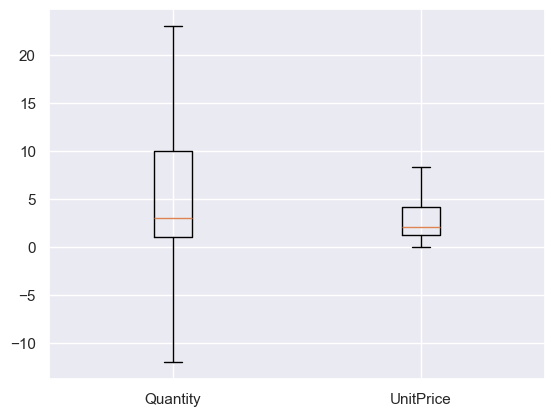

In [22]:
plt.boxplot(
    [numeric_data["Quantity"], numeric_data["UnitPrice"]],
    labels=["Quantity", "UnitPrice"],
    showfliers=False
)
plt.show()


### Q7. Analyze each attribute using the factor plot analysis using Seaborne library

In [ ]:
countries = []
unitprices = []
quantities = []

for row in data:
    try:
        countries.append(row["Country"])
        unitprices.append(float(row["UnitPrice"]))
        quantities.append(float(row["Quantity"]))
    except:
        continue


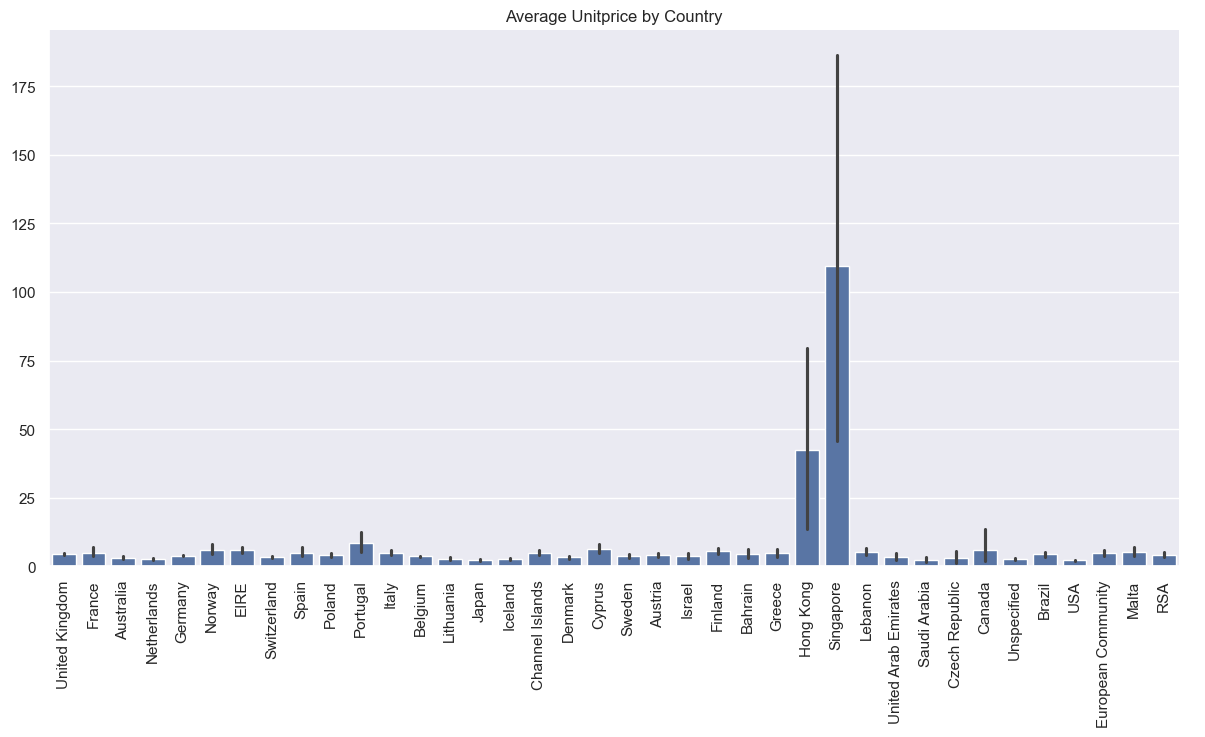

In [35]:
import seaborn
import matplotlib.pyplot as plt

sns.catplot( x=countries, y=unitprices, kind ="bar", height=6, aspect=2)
plt.xticks(rotation = 90)
plt.title("Average Unitprice by Country")
plt.show()

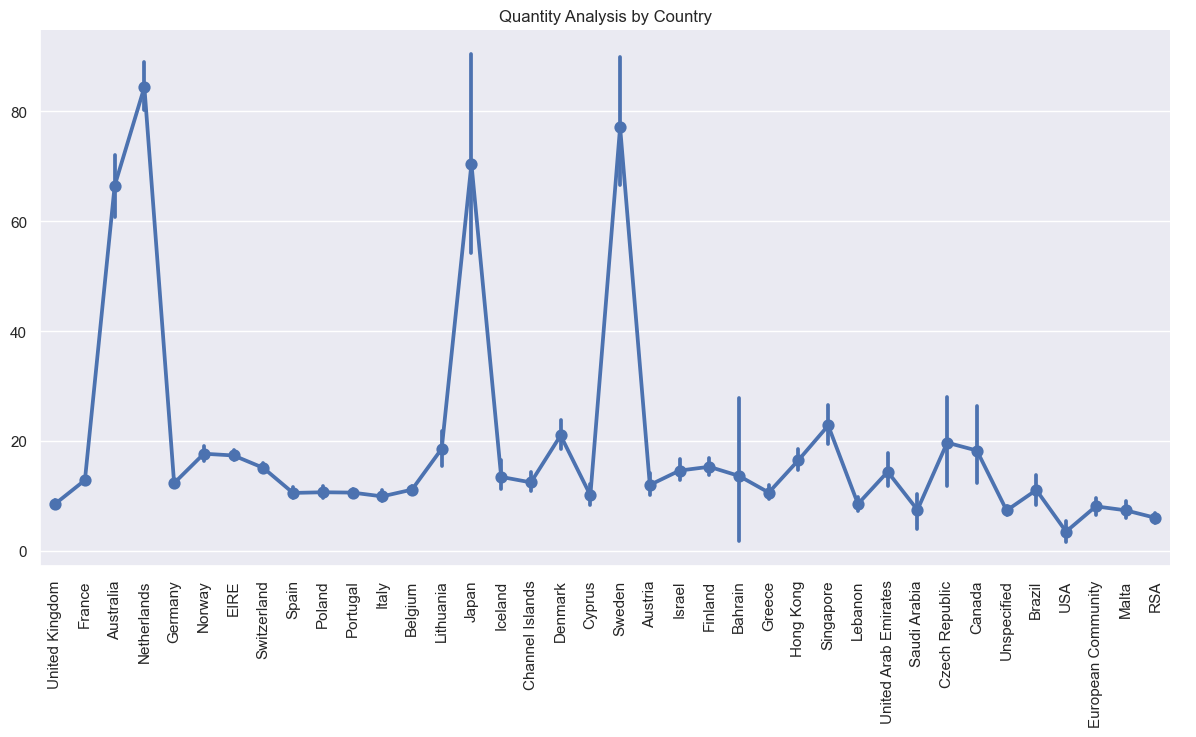

In [30]:
sns.catplot(
    x=countries,
    y=quantities,
    kind="point",
    height=6,
    aspect=2
)

plt.xticks(rotation=90)
plt.title("Quantity Analysis by Country")
plt.show()
